# 220968280 - Anirudh Swaminathan - DSE A2

## Week 5 - Exercise 4 - decision trees and random forest on bands.data

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

### 1. decision tree

In [2]:
df = pd.DataFrame()
df = pd.read_table('bands.data', delimiter=',')
df.columns = ['timestamp','cylinder number','customer','job number','grain screened','ink color','proof on ctd ink','blade mfg','cylinder division','paper type','ink type','direct steam','solvent type','type on cylinder','press type','press','unit number','cylinder size','paper mill location','plating tank','proof cut','viscosity','caliper','ink temperature','humidity','roughness','blade pressure','varnish pct','press speed','ink pct','solvent pct','ESA Voltage','ESA Amperage','wax','hardener','roller durometer','current density','anode space ratio','chrome content','band type']
df = df.drop('timestamp', axis=1)
df.head()

,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,ink type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
1,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
2,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
3,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
4,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,...,37.6,5,0,2.5,0.8,40,40,103.87,100,noband


In [3]:
string_to_int= preprocessing.LabelEncoder()
df=df.apply(string_to_int.fit_transform)
df.head()

,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,ink type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,305,61,24,3,1,3,2,1,2,3,...,61,0,0,22,8,4,4,20,0,1
1,11,49,245,3,1,3,2,1,2,1,...,73,0,0,26,12,8,4,19,0,1
2,222,47,238,3,1,3,2,1,2,3,...,63,0,0,22,18,8,4,40,0,1
3,154,44,194,2,1,3,2,1,2,1,...,95,13,0,20,6,5,4,33,0,1
4,228,47,228,3,1,3,2,1,2,3,...,53,13,0,22,10,8,4,19,0,1


In [4]:
feature_cols = ['cylinder number','customer','job number','grain screened','ink color','proof on ctd ink','blade mfg','cylinder division','paper type','ink type','direct steam','solvent type','type on cylinder','press type','press','unit number','cylinder size','paper mill location','plating tank','proof cut','viscosity','caliper','ink temperature','humidity','roughness','blade pressure','varnish pct','press speed','ink pct','solvent pct','ESA Voltage','ESA Amperage','wax','hardener','roller durometer','current density','anode space ratio','chrome content']
X = df[feature_cols]
y = df['band type']
y = pd.DataFrame(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.8213119369369369, 0.9772727272727273, 'ink pct <= 73.5\ngini = 0.491\nsamples = 540\nvalue = [226, 312, 2]\nclass = a'),
 Text(0.6714527027027027, 0.9318181818181818, 'press speed <= 61.5\ngini = 0.449\nsamples = 471\nvalue = [160, 311, 0]\nclass = a'),
 Text(0.4438063063063063, 0.8863636363636364, 'press type <= 3.5\ngini = 0.481\nsamples = 376\nvalue = [151, 225, 0]\nclass = a'),
 Text(0.30923423423423424, 0.8409090909090909, 'viscosity <= 26.5\ngini = 0.438\nsamples = 247\nvalue = [80, 167, 0]\nclass = a'),
 Text(0.21216216216216216, 0.7954545454545454, 'job number <= 36.5\ngini = 0.407\nsamples = 222\nvalue = [63, 159, 0]\nclass = a'),
 Text(0.09009009009009009, 0.75, 'unit number <= 3.5\ngini = 0.499\nsamples = 44\nvalue = [23, 21, 0]\nclass = b'),
 Text(0.02882882882882883, 0.7045454545454546, 'blade pressure <= 7.5\ngini = 0.32\nsamples = 15\nvalue = [3, 12, 0]\nclass = a'),
 Text(0.014414414414414415, 0.6590909090909091, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0]\ncl

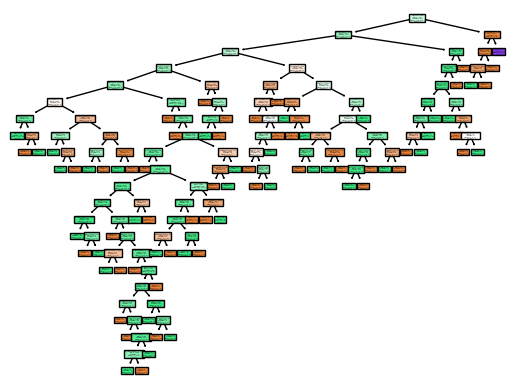

In [7]:
tree.plot_tree(clf,feature_names=feature_cols,class_names='band type',filled=True)

In [8]:
with open('dt1_bands.txt',"w") as f:
    f = tree.export_graphviz(clf, out_file=f, 
                                feature_names=feature_cols,  
                                class_names='band type',
                                filled=True)


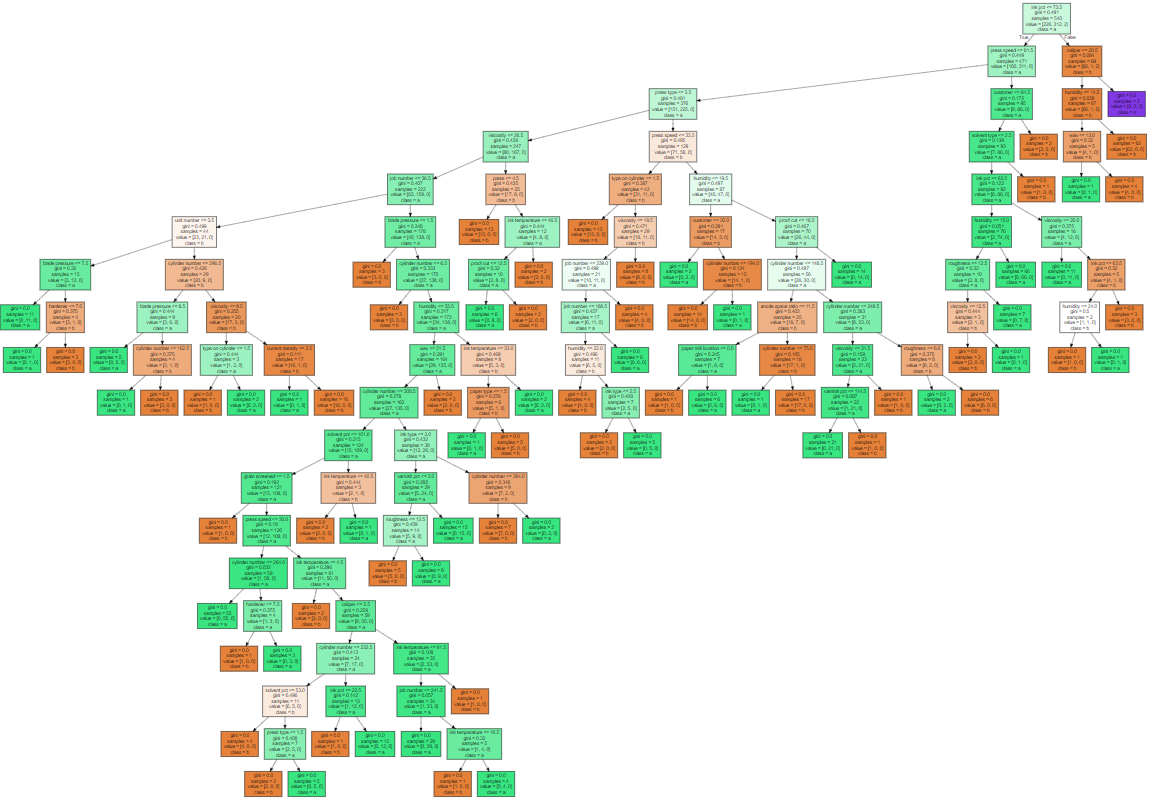

### 2. random forest classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

C:\Users\mca\AppData\Local\Temp\ipykernel_3300\71670089.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)


RandomForestClassifier(max_depth=2, random_state=0)

[Text(0.5, 0.8333333333333334, 'solvent pct <= 113.5\ngini = 0.498\nsamples = 340\nvalue = [239, 299, 2]\nclass = o'),
 Text(0.25, 0.5, 'ink pct <= 74.0\ngini = 0.467\nsamples = 300\nvalue = [177, 299, 0]\nclass = o'),
 Text(0.125, 0.16666666666666666, 'gini = 0.456\nsamples = 292\nvalue = [162, 299, 0]\nclass = o'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [15, 0, 0]\nclass = J'),
 Text(0.75, 0.5, 'roughness <= 22.5\ngini = 0.061\nsamples = 40\nvalue = [62, 0, 2]\nclass = J'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [62, 0, 0]\nclass = J'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = b')]

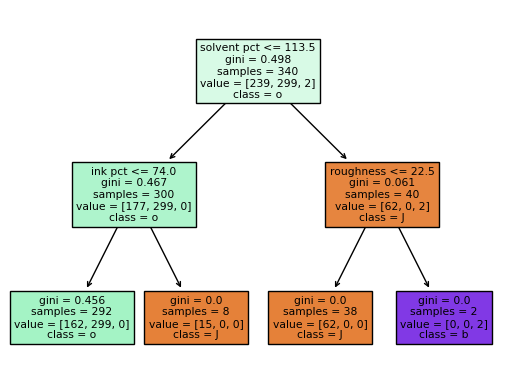

In [11]:
tree.plot_tree(clf.estimators_[0],feature_names=feature_cols,class_names='Job_Offer',filled=True)

In [12]:
with open('dt2_bands.txt',"w") as f:
    f = tree.export_graphviz(clf.estimators_[0], out_file=f, 
                                feature_names=feature_cols,  
                                class_names='band type',
                                filled=True)

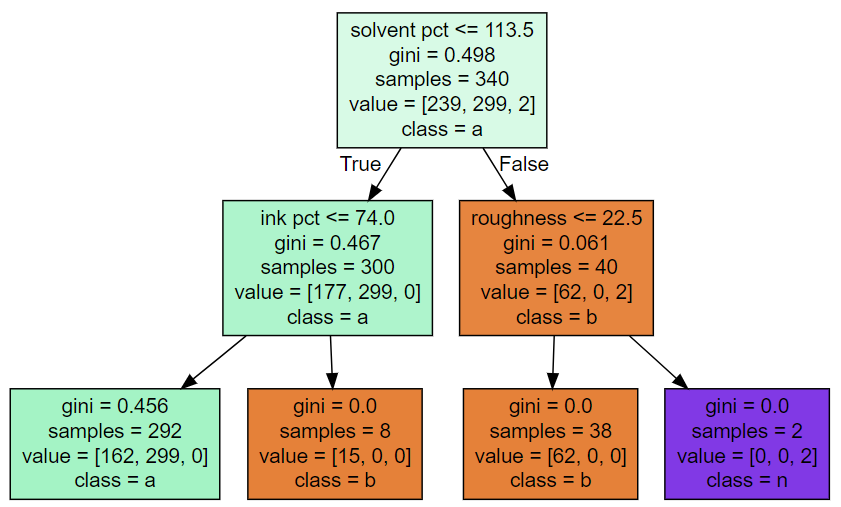